##### Descriptive Time Series Analysis on Google Searches # 

In this notebook we use descriptive time series analysis to investigate whether two search terms are correlated to each other or are linked to a third factor. The investigated search terms are Kürbis (eng. pumpkin) and Kostüm (eng. costume). The data was obtained from Google Trends and the geographical area is Germany.

<img src="joint_search_interest.png" width="400" />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descriptive-Time-Series-Analysis-with-Google-Trends-data" data-toc-modified-id="Descriptive-Time-Series-Analysis-with-Google-Trends-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descriptive Time Series Analysis with Google Trends data</a></span></li><li><span><a href="#Separate-Analysis" data-toc-modified-id="Separate-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Separate Analysis</a></span><ul class="toc-item"><li><span><a href="#Choice-of-Model:-Additive-or-Multiplicative?" data-toc-modified-id="Choice-of-Model:-Additive-or-Multiplicative?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Choice of Model: Additive or Multiplicative?</a></span></li><li><span><a href="#Decomposition" data-toc-modified-id="Decomposition-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decomposition</a></span></li></ul></li><li><span><a href="#Joint-Analysis" data-toc-modified-id="Joint-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Joint Analysis</a></span><ul class="toc-item"><li><span><a href="#Kürbis" data-toc-modified-id="Kürbis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Kürbis</a></span><ul class="toc-item"><li><span><a href="#Differencing" data-toc-modified-id="Differencing-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Differencing</a></span></li><li><span><a href="#Tests" data-toc-modified-id="Tests-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Tests</a></span></li></ul></li><li><span><a href="#Kostüm" data-toc-modified-id="Kostüm-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Kostüm</a></span></li></ul></li><li><span><a href="#Conclusions-&amp;-Managerial-insights" data-toc-modified-id="Conclusions-&amp;-Managerial-insights-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusions &amp; Managerial insights</a></span></li></ul></div>

# Descriptive Time Series Analysis with Google Trends data

We chose the search terms 'Kürbis' and 'Kostüm'.

In [14]:
# Read data
setwd('C:/Users/Kevin/Desktop/Descriptive TS Analysis with Google Trends')
Kostüm <- read.csv("Kostüm_2011_DE.csv")
Kürbis <- read.csv("Kürbis_2011_DE.csv")

# Import the library
library(tseries) 

# Create Time Series (TS)
Kürbis.ts <- ts(Kürbis, start=c(2011, 1), end=c(2016, 12), frequency=12)
Kürbis.ts

Kostüm.ts <- ts(Kostüm, start=c(2011, 1), end=c(2016, 12), frequency=12)
Kostüm.ts

# Test if TS really is TS
is.ts(Kürbis.ts)
is.ts(Kostüm.ts)

Warning message:
"package 'tseries' was built under R version 3.6.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2011,3,3,2,2,2,2,3,7,20,38,12,5
2012,3,2,2,2,2,2,3,8,28,50,16,6
2013,4,3,3,3,2,2,3,8,28,58,19,7
2014,5,4,4,3,3,3,4,12,36,72,23,9
2015,7,6,4,3,3,3,4,10,40,83,25,10
2016,8,5,4,4,4,3,4,11,37,100,29,11


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2011,28,44,17,6,6,5,4,5,6,15,11,11
2012,49,53,10,7,7,6,5,6,8,18,13,13
2013,64,37,10,7,6,6,5,7,8,21,14,13
2014,47,72,17,9,8,7,5,7,9,24,15,14
2015,72,58,10,8,8,7,6,7,11,32,18,20
2016,97,39,10,9,8,7,7,8,12,34,18,18


[1] TRUE

[1] TRUE

# Separate Analysis

## Choice of Model: Additive or Multiplicative?

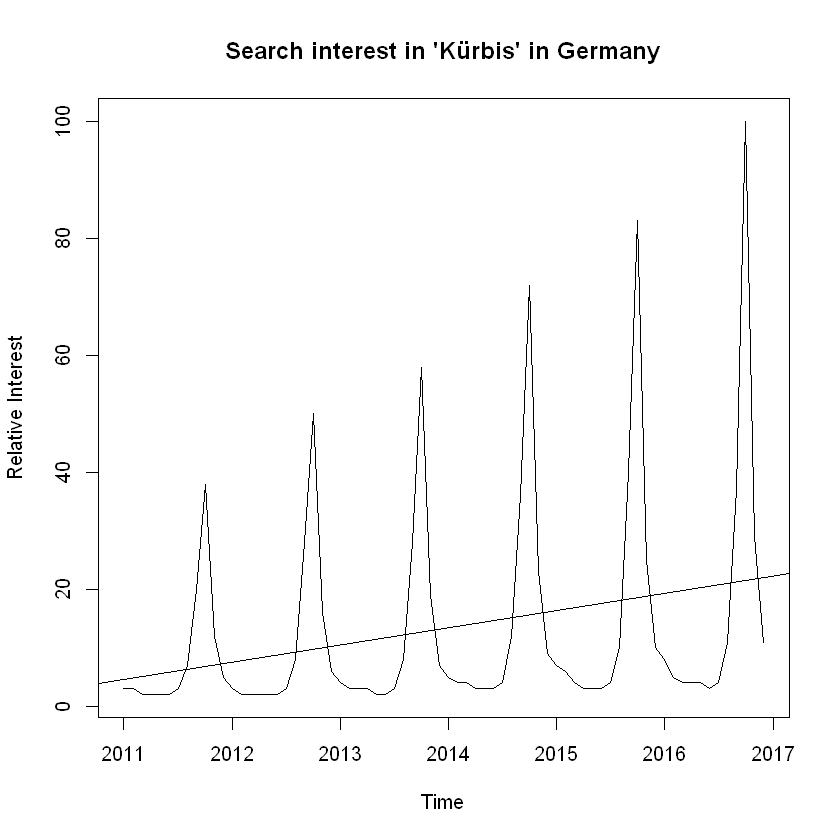

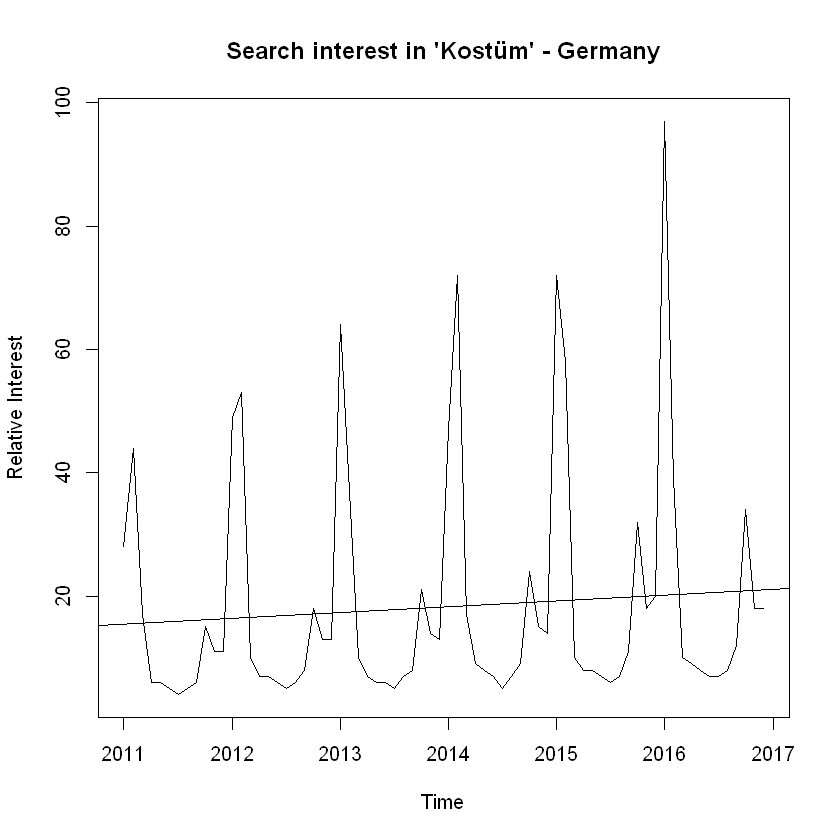

In [165]:
# Plot TS and add simple regression line -> trend
plot(Kürbis.ts, main = "Search interest in 'Kürbis' in Germany", ylab = "Relative Interest")
abline(reg=lm(Kürbis.ts~time(Kostüm.ts)))

# Plot search interest in Kostüm with trend line
plot(Kostüm.ts, main = "Search interest in 'Kostüm' - Germany", ylab = "Relative Interest")
abline(reg=lm(Kostüm.ts~time(Kostüm.ts)))

From plotting the examined time series with an additional regression line, it can be confirmed that the time series can be described using a multiplicative model, since the seasonal variation tends to incline as the trend increases. There is a peak every autumn and a trough throughout the spring and summer periods for `Kürbis.ts` and a peak every year around October and February for `Kostüm.ts`. It can be observed that the values enlarge in every period. Therefore the following structure is considered for basic decomposition models:  $x_t = m_t * s_t + z_t$. Taking into account the applicability of a multiplicative model, the function is extended with the command `type=”multiplicative”`, otherwise R initially assumes an additive model. 

**Conclusion: We choose the multiplicative model.**

## Decomposition

By decomposing, the time series is constituted into a seasonal component, a trend component and an irregular component, called random by adducing the `decompose()` function in R. A plot illustrates the original time series, the estimated trend component, the estimated seasonal component, and the estimated irregular component. A separated analysis of each factor improves the interpretability of the data.

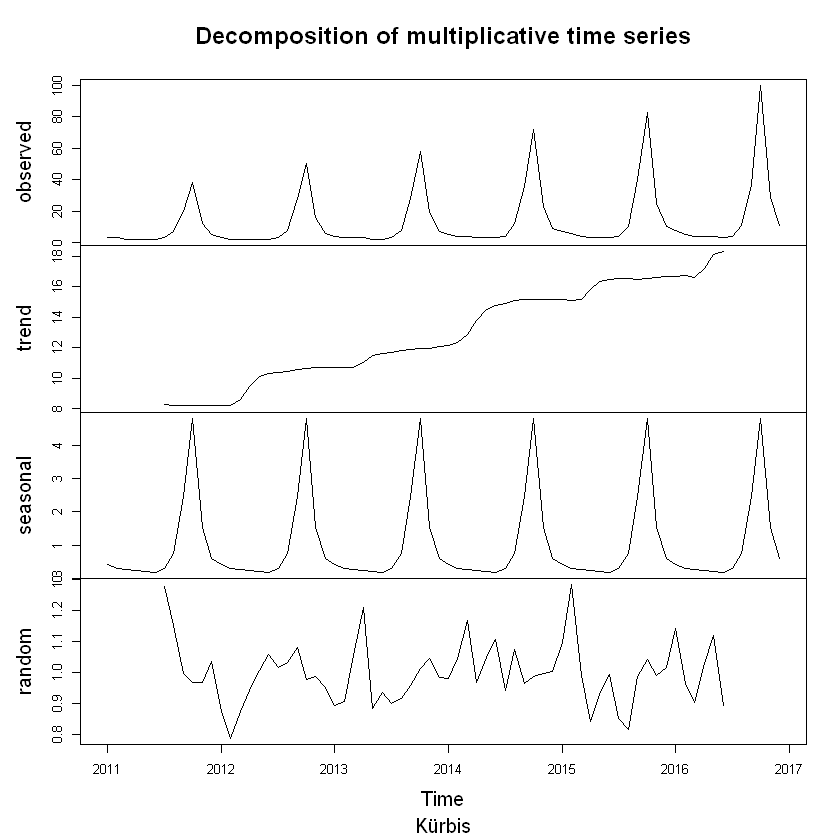

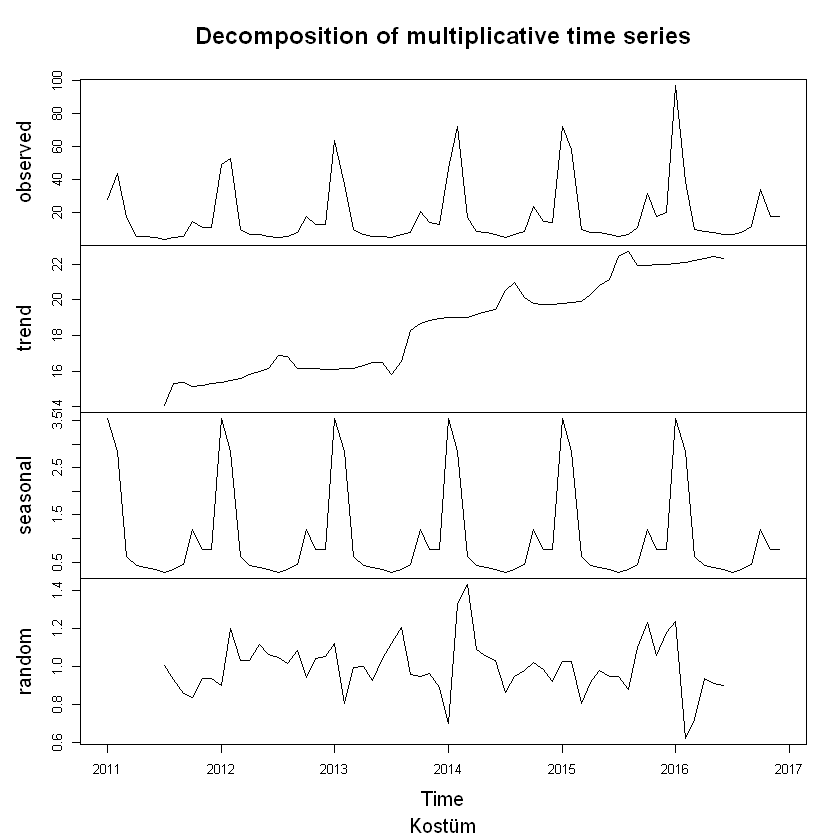

In [164]:
# Decompose the Kürbis TS into seasonal, trend, and random component
Kürbis.dp <- decompose(Kürbis.ts, type = "multiplicative")
plot(Kürbis.dp)
title(sub = "Kürbis")

# Decompose the Kürbis TS into seasonal, trend, and random component
Kostüm.dp <- decompose(Kostüm.ts, type = "multiplicative")
plot(Kostüm.dp)
title(sub = "Kostüm")

**Trend analysis**

The exhibited trend lines for both `Kürbis.ts` and `Kostüm.ts` depict a steady increase from 2011 onwards.

**Seasonality**

Secondly, a closer look at the estimated seasonal factors which are given for the months January-December, shows how similar they are for each year respectively: The largest seasonal factor for `Kürbis.ts` is for October about 35.36, and the lowest is for May about -7.83, indicating that there seems to be a peak in Google searches and a trough each year. 

**Analysis of a seasonally and trend adjusted time series**

The separation of the seasonal and the trend component leaves the random component. Compared to the original TS the random component's standard deviation is significantly lower, see e.g. 

`SD(Kürbis.ts) = 19.53605` 

`SD(Kürbis.ts.ran) = 0.1005947`

In [171]:
# Result summaries
#summary(Kürbis.ts)
#summary(Kostüm.ts)

In [87]:
# Variance
cat('SD of the Kürbis TS =', round(var(Kürbis.ts),2),'\n')
cat('SD of the Kostüm TS =', round(var(Kostüm.ts),2),'\n')

# Standard deviation
cat('SD of Kürbis TS=', round(sd(Kürbis.ts),2),'\n')
cat('SD of Kürbis TS=', round(sd(Kostüm.ts),2),'\n')

SD of the Kürbis TS = 381.66 
SD of the Kostüm TS = 363.45 
SD of Kürbis TS= 19.54 
SD of Kürbis TS= 19.06 


In [170]:
#Mean each period
#aggregate(Kürbis.ts, FUN=mean)
#aggregate(Kostüm.ts, FUN=mean)

#Variance each period
#aggregate(Kürbis.ts, FUN=var)
#aggregate(Kostüm.ts, FUN=var)

# Joint Analysis

For further understanding of the relation Kürbis-Kostüm, the time series are plotted jointly. A repeating coherence of the two time series could be assumed during the autumn period of each year. However, the calculated correlation between `Kürbis.ts` and `Kostüm.ts` results into a correlation coefficient of 0.06587115. This value is significantly low, underlining the absence of a correlation between the search queries considering the entire period; i.e. an increase in interest for one does not imply the decrease or rise of interest in the other one.

Correlation between Kürbis TS and Kostüm TS = 0.06587115 


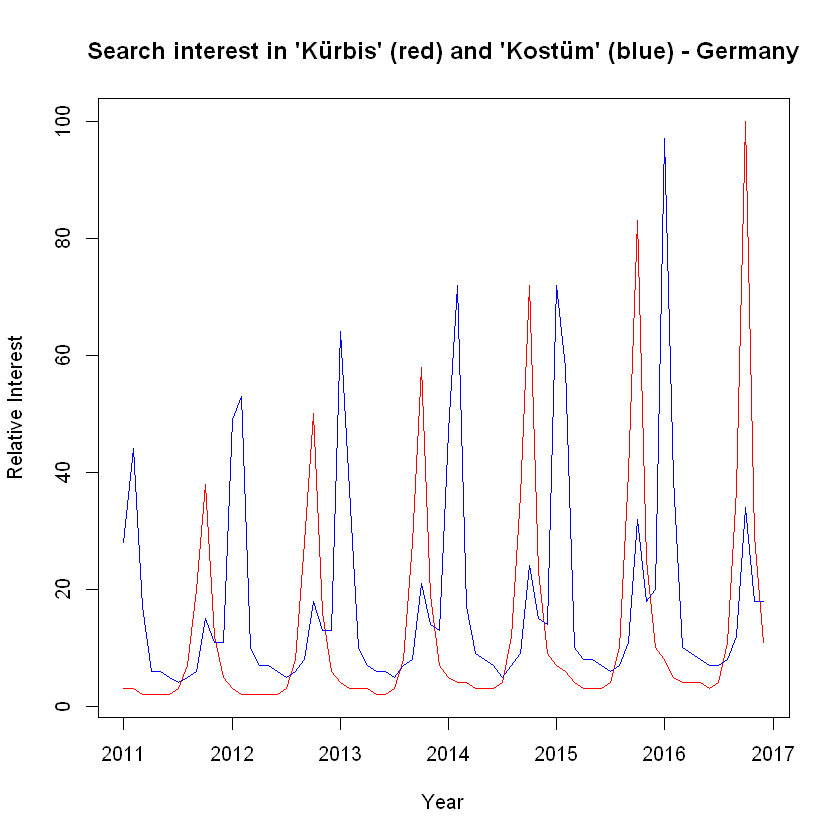

In [190]:
# Plot multiple TS to compare then
ts.plot(Kürbis.ts, Kostüm.ts, col=c("red","blue"), main = "Search interest in 'Kürbis' (red) and 'Kostüm' (blue) - Germany", ylab = "Relative Interest", xlab = "Year")

# Correlation for all periods
cat("Correlation between Kürbis TS and Kostüm TS =",cor(Kürbis.ts, Kostüm.ts),'\n')

When taking a closer look at the correlations from September to November in each year, the initial assumption of data coherence appears to be confirmed. At this point the analysis needs to be seen in a broader context. Hereby it can be determined that this phenomenon concerns a spurious correlation: Although the data might be misleading, the search interest for pumpkins and costumes may be triggered by other factors that influence both of them in a similar way. It has to be taken into account that a data correlation does not imply actual causation. Hence a direct correlation cannot unambiguously be found. 

From merely analysing the data shielded from any external factors, the question arises whether a downward trend in Kostüm searches might equally induce a deterioration in Kürbis searches. And beyond that: Could a rise of the Kürbis searches in September be the reason for the renewed incline of Kostüm searches?

In order to investigate whether these assumptions might be true, the underlying dynamics of the relation between Kürbis and Kostüm are taken into consideration. Accordingly, a cross correlation of `Kürbis.ts` and `Kostüm.ts` has to be examined.


In [209]:
# Correlation for each year's fall
list_year <- c()
list_cor  <- c()
for (i in (0:5)){    # The year 2011-2016
    sep <- i*12 + 9   # Each September
    nov <- sep + 2    # Each November
    year <- 2011 + i  
    # Correlation between Kürbis TS and Kostüm TS in the months Sep, Oct, Nov for each year
    cor <- round(cor(Kürbis.ts[sep:nov], Kostüm.ts[sep:nov]),3)
    list_year <- append(list_year, year)
    list_cor <- append(list_cor, cor)
}

df <- data.frame(list_year, list_cor)
print(df)

  list_year list_cor
1      2011    0.627
2      2012    0.638
3      2013    0.764
4      2014    0.785
5      2015    0.834
6      2016    0.932


## Kürbis

To understand the relation between the two-time series, the focus is drawn on an investigation of a cross correlation. The absence of trend and seasonality effects is ensured by only looking at the random component. Note, the first six and the last six terms cannot be calculated in R and therefore are deposited as NA.

In [210]:
# Performing the cross correlation function
# Decompose multiplicative time series into the random part
Kürbis.ran <- decompose(Kürbis.ts, type = "multiplicative")$random
head(Kürbis.ran)

Kürbis.ran.ts <- window(Kürbis.ran, start = c(2011, 7), end = c(2016,6))
head(Kürbis.ran.ts)

[1] NA NA NA NA NA NA

[1] 1.2790632 1.1515456 0.9969381 0.9680447 0.9677397 1.0360626

Comparing standard deviation between the Kürbis TS and the random component as a TS, we see that the latter has a significantly lower SD.

In [184]:
cat('SD of Kürbis.ts =',sd(Kürbis.ts),'\n')
cat('SD of Kürbis.ran.ts =',sd(Kürbis.ran.ts)) 

SD of Kürbis.ts = 19.53605 
SD of Kürbis.ran.ts = 0.1005947

The plot below shows the random component of our decomposed time series which looks very much like white noise.

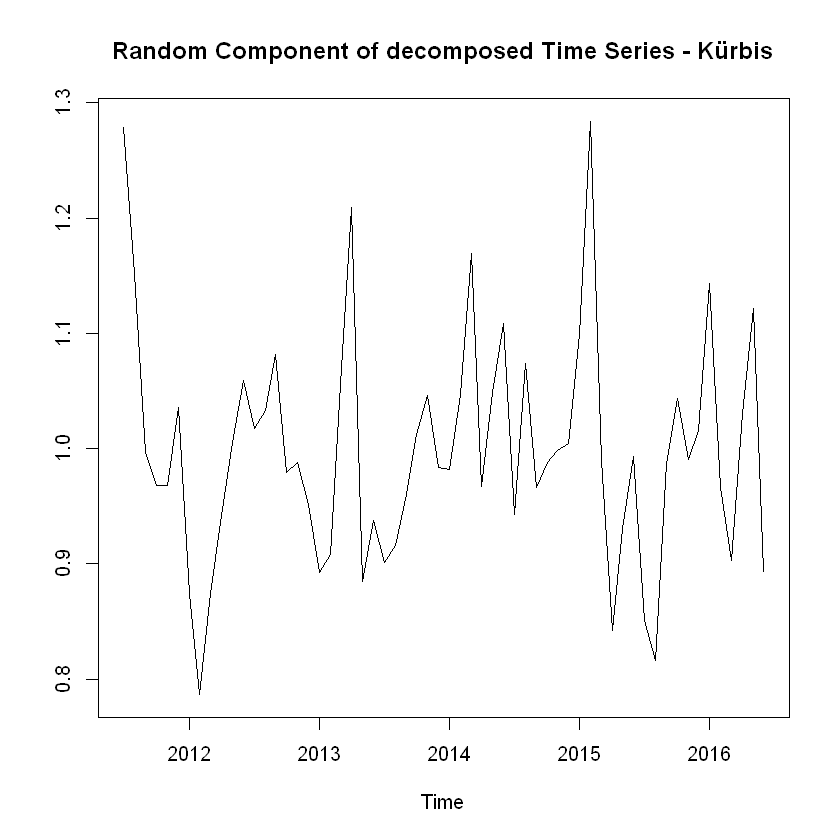

In [212]:
plot(Kürbis.ran.ts, main = "Random Component of decomposed Time Series - Kürbis", ylab = "")

To perform a cross correlation analysis, we need to check whether the 2nd order properties, i.e. weak stationarity, for the the white noise series are met.

mean 0.9982384 
var 0.01011929

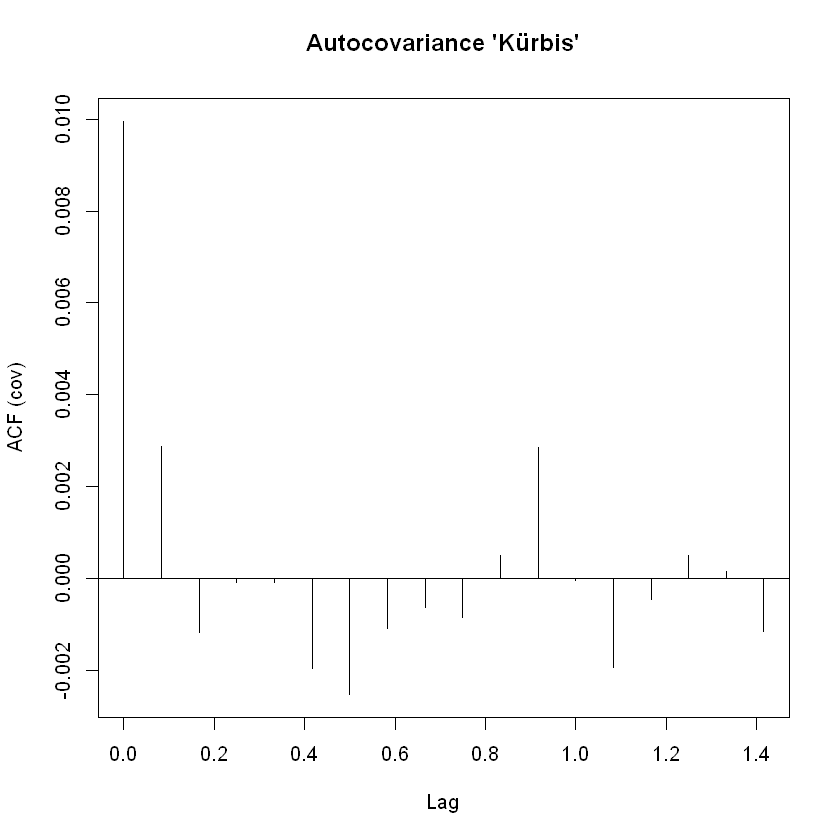

In [220]:
cat("mean",mean(Kürbis.ran.ts),"\n")
cat("var",var(Kürbis.ran.ts))
acf(Kürbis.ran.ts,type="covariance",main="Autocovariance 'Kürbis'")

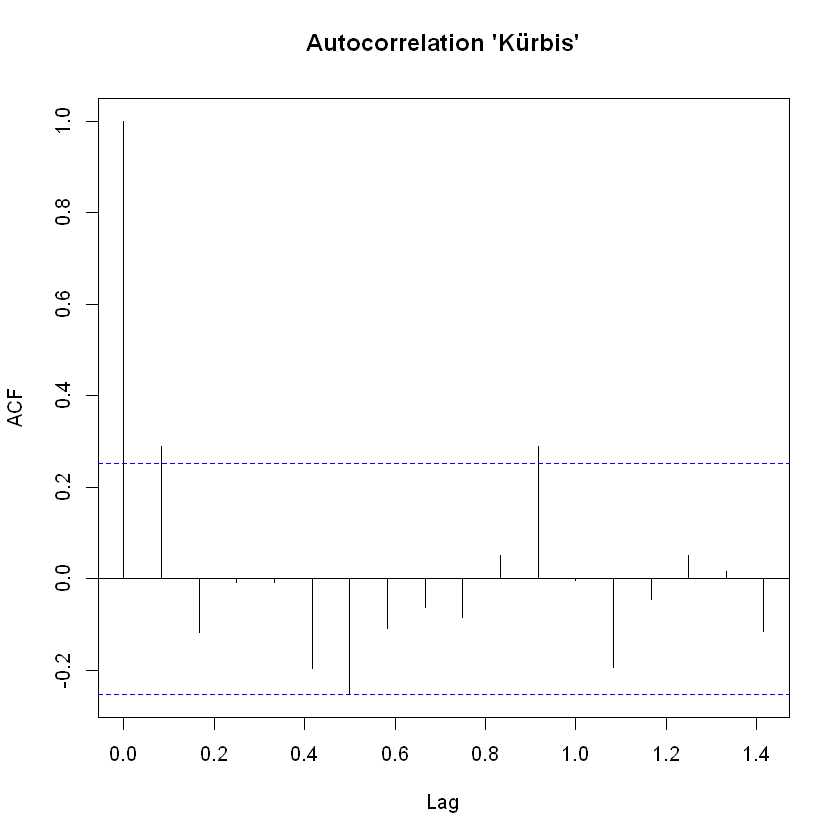

In [221]:
acf(Kürbis.ran.ts,type="correlation",main="Autocorrelation 'Kürbis'")
#print(acf(Kürbis.ran.ts,type="correlation",main="Autocorrelation 'Kürbis'"))

### Differencing

However, in the object `Kürbis.ran.ts` stationarity is not applicable since the mean lies around 1.
Nonetheless it is possible to transform a non-stationary time series into a stationary time series by
differencing with function `diff()`. When differencing the time series `Kürbis.ran.ts` and `Kostüm.ran.ts` once and comparing the results with the second order properties, characteristics for stationarity are demonstrated. After
differencing the time series twice and three times, it becomes obvious that differencing the time series
once brings the output closest to stationarity. Second order properties are fulfilled with only minor
swings in the autocorrelation that can be ignored. However these swings could slightly impact the result
of the cross correlation analysis.

mean of white noise = -0.006532969 
var of white noise = 0.01304033

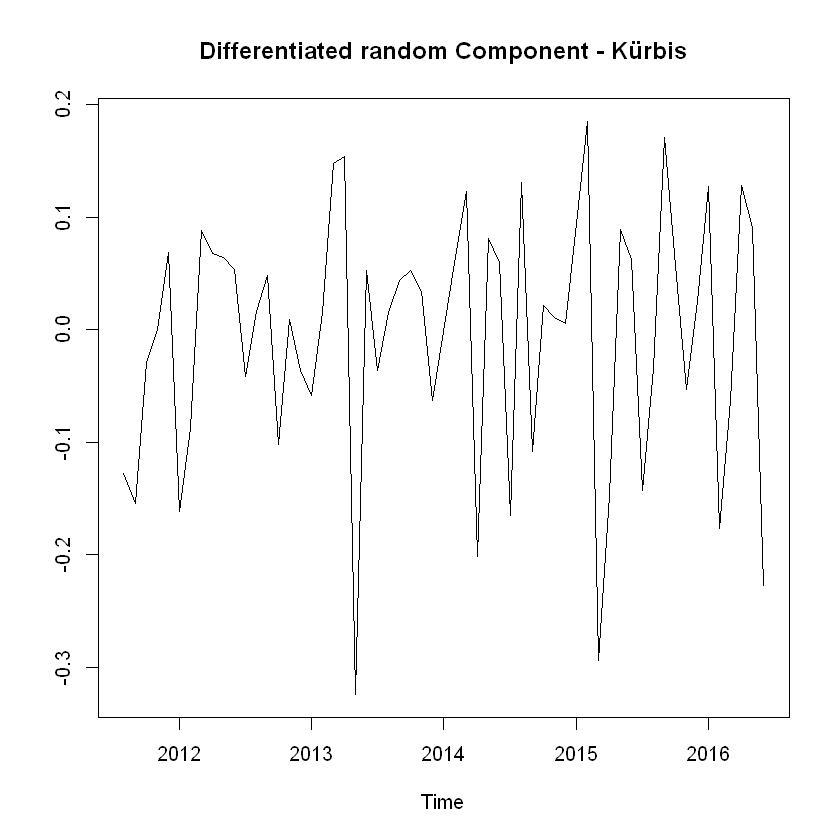

In [225]:
# First differentiation deviates least from the second order properties of white noise series
Kürbis.WN <- diff(Kürbis.ran.ts, differences=1)
plot(Kürbis.WN, main = "Differentiated random Component - Kürbis", ylab = "")
cat("mean of white noise =", mean(Kürbis.WN),"\n")
cat("var of white noise =",var(Kürbis.WN))


Autocovariances of series 'Kürbis.WN', by lag

   0.0000    0.0833    0.1667    0.2500    0.3333    0.4167    0.5000    0.5833 
 0.012819 -0.002075 -0.004630  0.001000  0.001994 -0.001298 -0.001502  0.001395 
   0.6667    0.7500    0.8333    0.9167    1.0000    1.0833    1.1667    1.2500 
 0.000371 -0.002008 -0.001664  0.005126 -0.000594 -0.003631  0.000113  0.002054 
   1.3333    1.4167 
 0.001491 -0.001538 


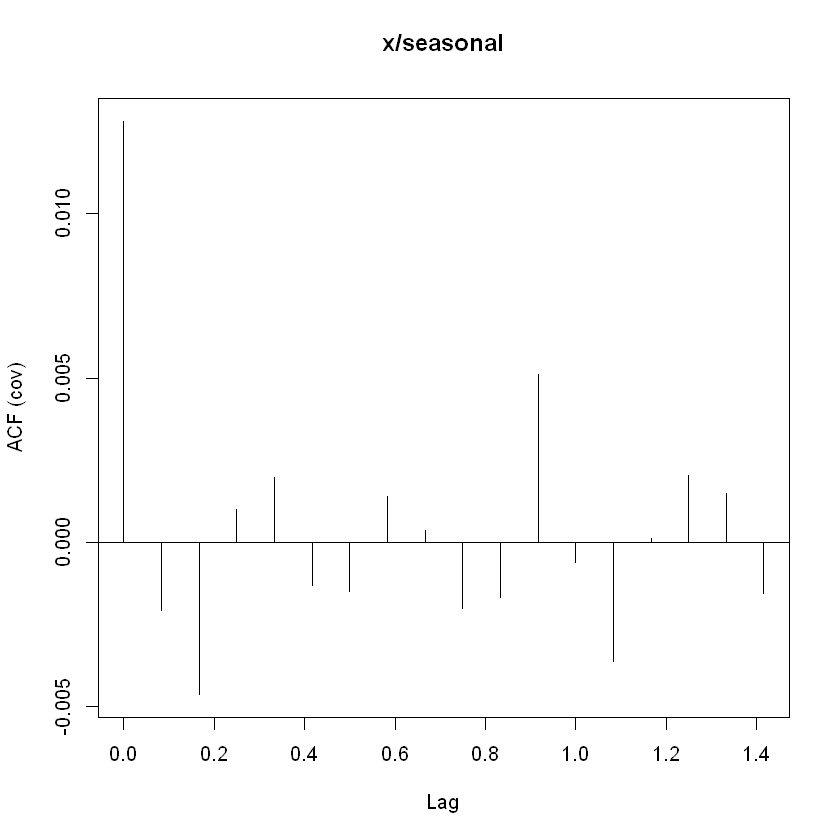

In [158]:
#acf(Kürbis.WN,type="covariance", main = "Autocovariance White Noise - Kürbis")
print(acf(Kürbis.WN,type="covariance"))


Autocorrelations of series 'Kürbis.WN', by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.162 -0.361  0.078  0.156 -0.101 -0.117  0.109  0.029 -0.157 -0.130 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 
 0.400 -0.046 -0.283  0.009  0.160  0.116 -0.120 


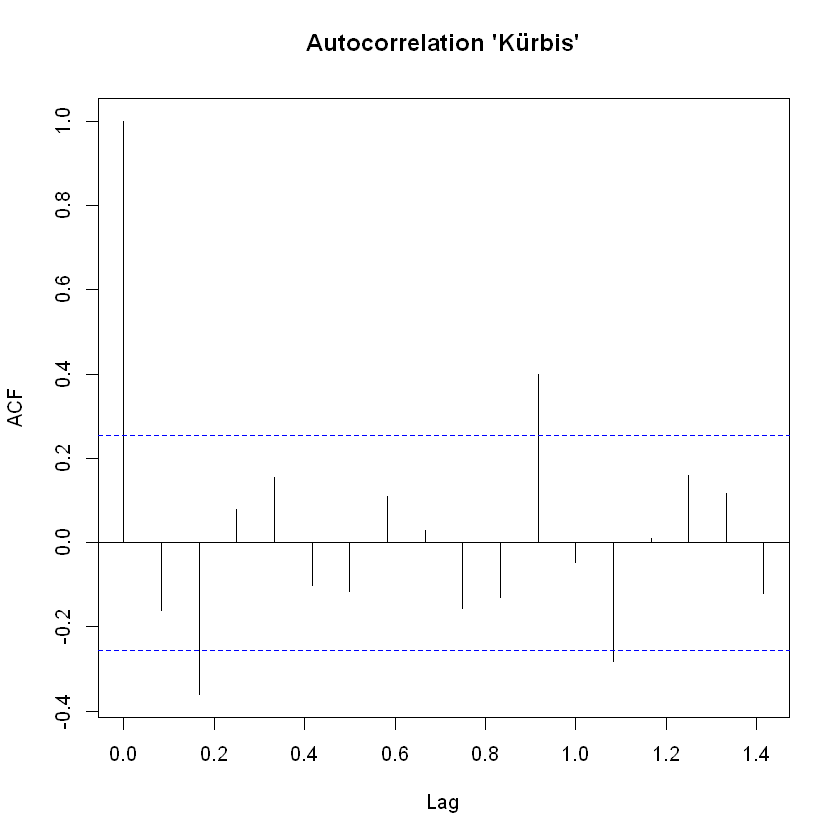

In [159]:
#acf(Kürbis.WN,type="correlation",main="Autocorrelation White Noise - Kürbis")
print(acf(Kürbis.WN,type="correlation",main="Autocorrelation 'Kürbis'"))

### Tests

In addition to the empirical proof, ADF and KPSS tests can be conducted. The ADF test is based on the null hypothesis that the time series is not stationary, so large pvalues are indicative of non-stationarity, and small p-values suggest stationarity. The KPSS reverses the hypotheses, so the null-hypothesis is that the data are stationary. In our case, both tests for the differentiated `Kürbis.ran.ts` and `Kostüm.ran.ts` time series suggest stationarity and hence confirm our stationarity assumption.

In [227]:
# Augmented Dickey-Fuller Test
adf.test(Kürbis.WN) 

Warning message in adf.test(Kürbis.WN):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Kürbis.WN
Dickey-Fuller = -5.0235, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


In [228]:
# Kwiatkowski-Phillips-Schmidt-Shin Test
kpss.test(Kürbis.WN)

Warning message in kpss.test(Kürbis.WN):
"p-value greater than printed p-value"



	KPSS Test for Level Stationarity

data:  Kürbis.WN
KPSS Level = 0.092828, Truncation lag parameter = 3, p-value = 0.1


## Kostüm

[1] 0.1005947

[1] 0.9971148

,x/seasonal
x/seasonal,0.02002584


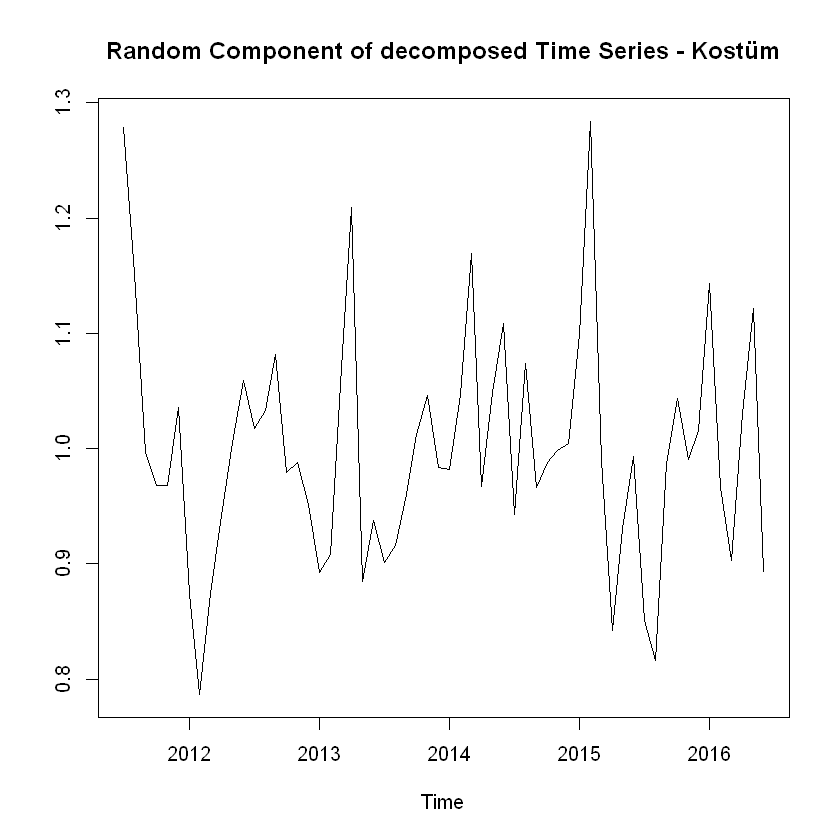

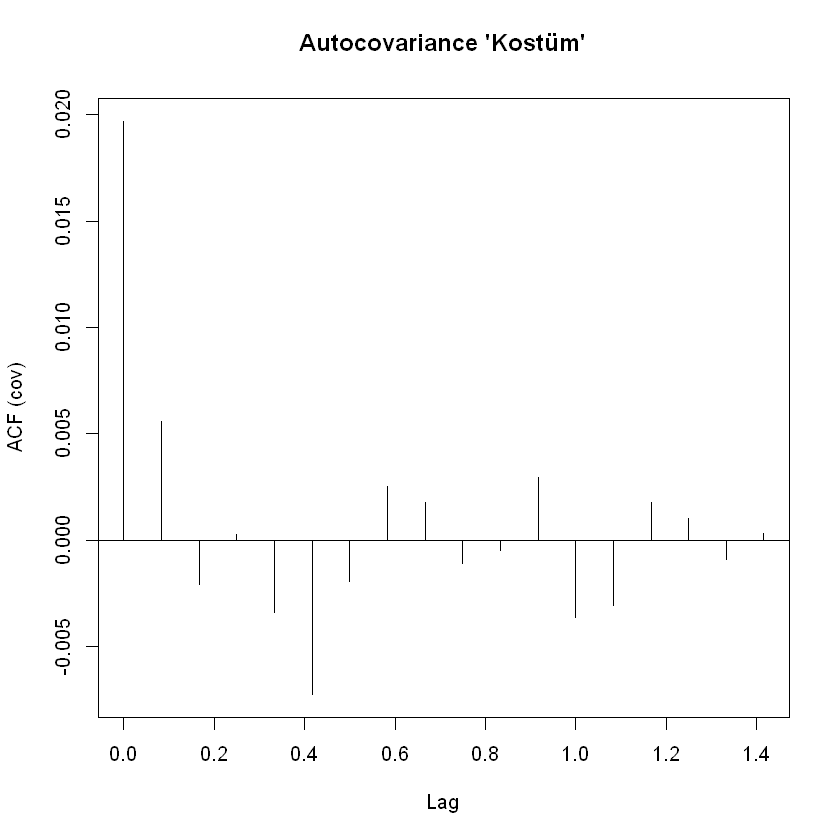


Autocovariances of series 'Kostüm.ran.ts', by lag

   0.0000    0.0833    0.1667    0.2500    0.3333    0.4167    0.5000    0.5833 
 0.019692  0.005565 -0.002104  0.000249 -0.003425 -0.007267 -0.001946  0.002508 
   0.6667    0.7500    0.8333    0.9167    1.0000    1.0833    1.1667    1.2500 
 0.001785 -0.001114 -0.000475  0.002947 -0.003653 -0.003078  0.001751  0.001013 
   1.3333    1.4167 
-0.000919  0.000308 


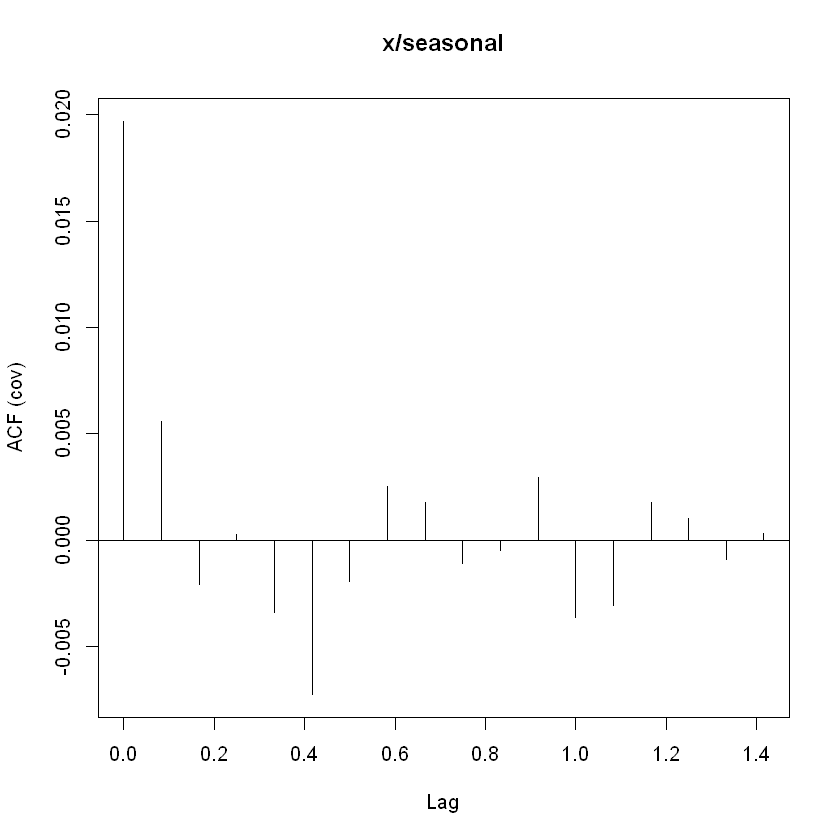


Autocorrelations of series 'Kostüm.ran.ts', by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000  0.283 -0.107  0.013 -0.174 -0.369 -0.099  0.127  0.091 -0.057 -0.024 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 
 0.150 -0.185 -0.156  0.089  0.051 -0.047  0.016 


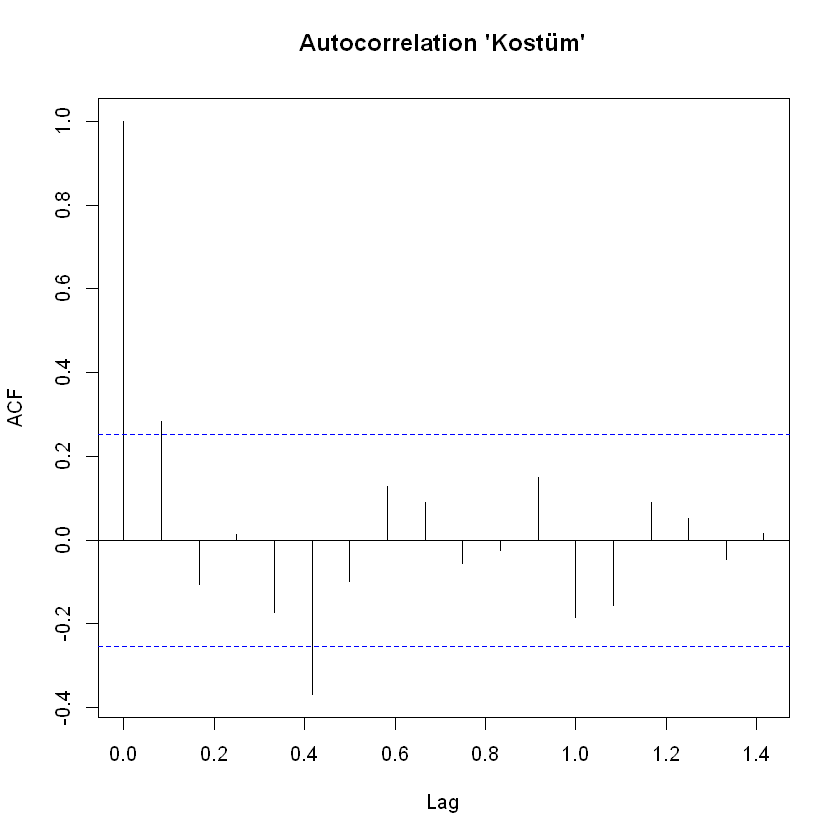

[1] -0.001858675

,x/seasonal
x/seasonal,0.02905637


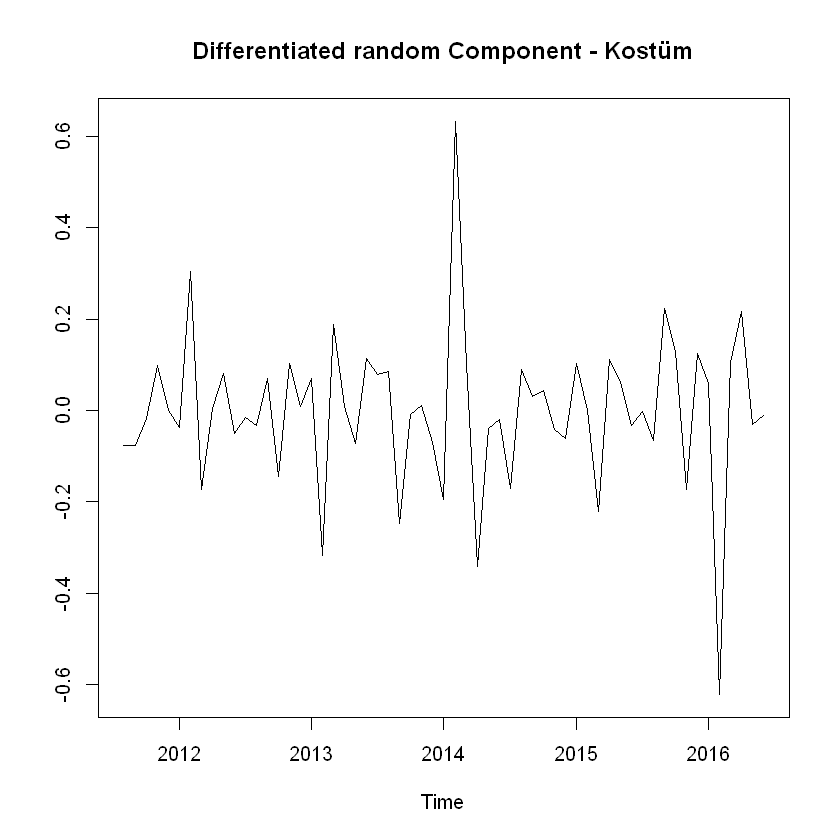

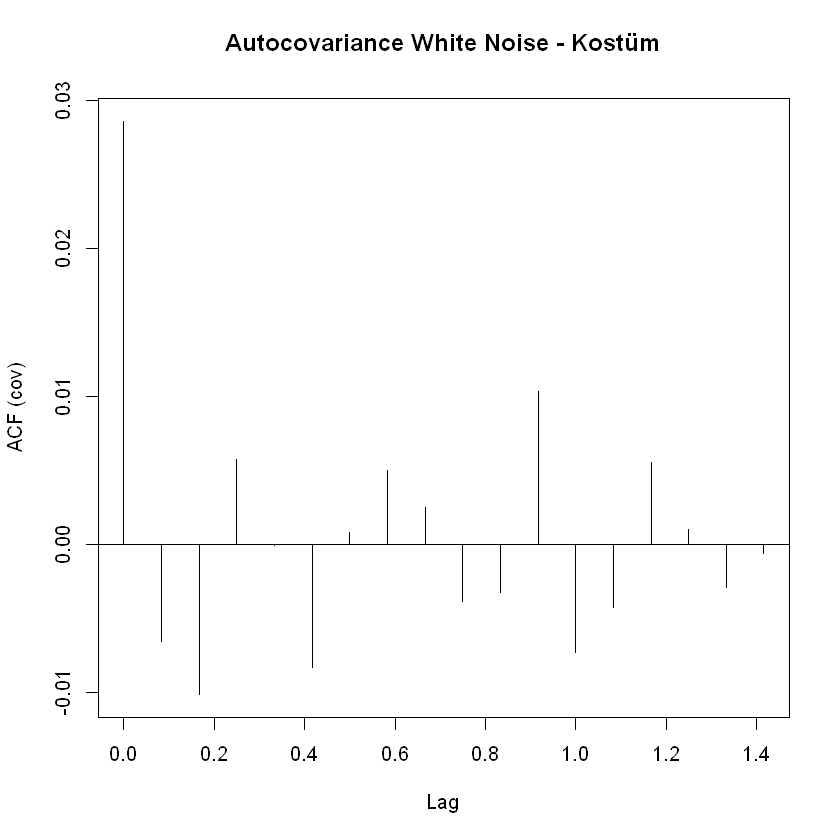


Autocovariances of series 'Kostüm.WN', by lag

   0.0000    0.0833    0.1667    0.2500    0.3333    0.4167    0.5000    0.5833 
 2.86e-02 -6.54e-03 -1.01e-02  5.77e-03 -3.18e-05 -8.27e-03  8.01e-04  5.00e-03 
   0.6667    0.7500    0.8333    0.9167    1.0000    1.0833    1.1667    1.2500 
 2.54e-03 -3.81e-03 -3.22e-03  1.03e-02 -7.29e-03 -4.27e-03  5.54e-03  1.05e-03 
   1.3333    1.4167 
-2.87e-03 -5.87e-04 


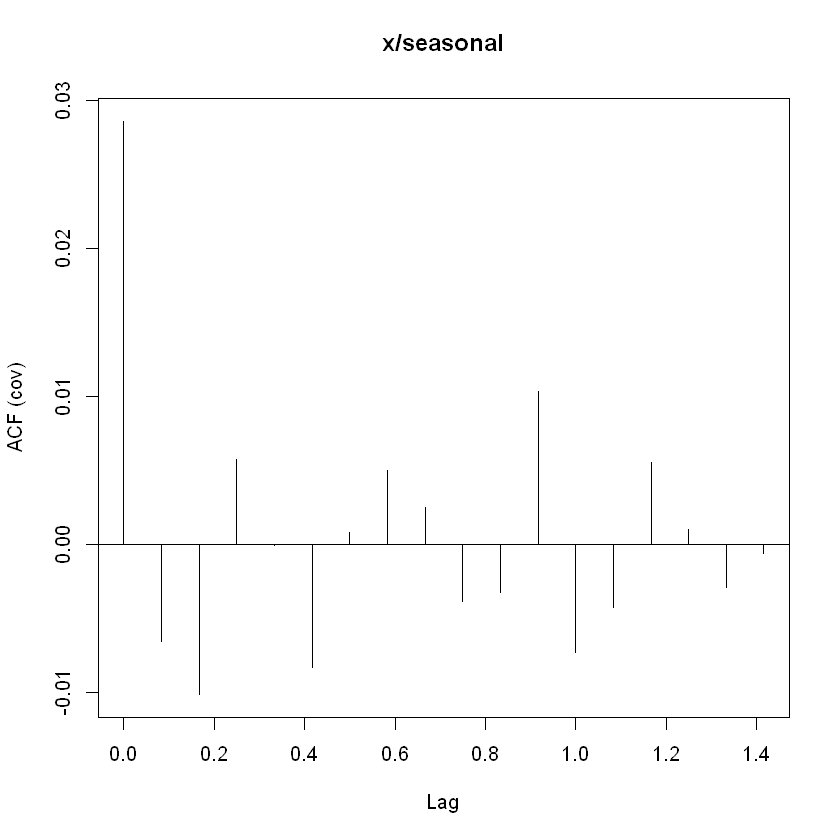

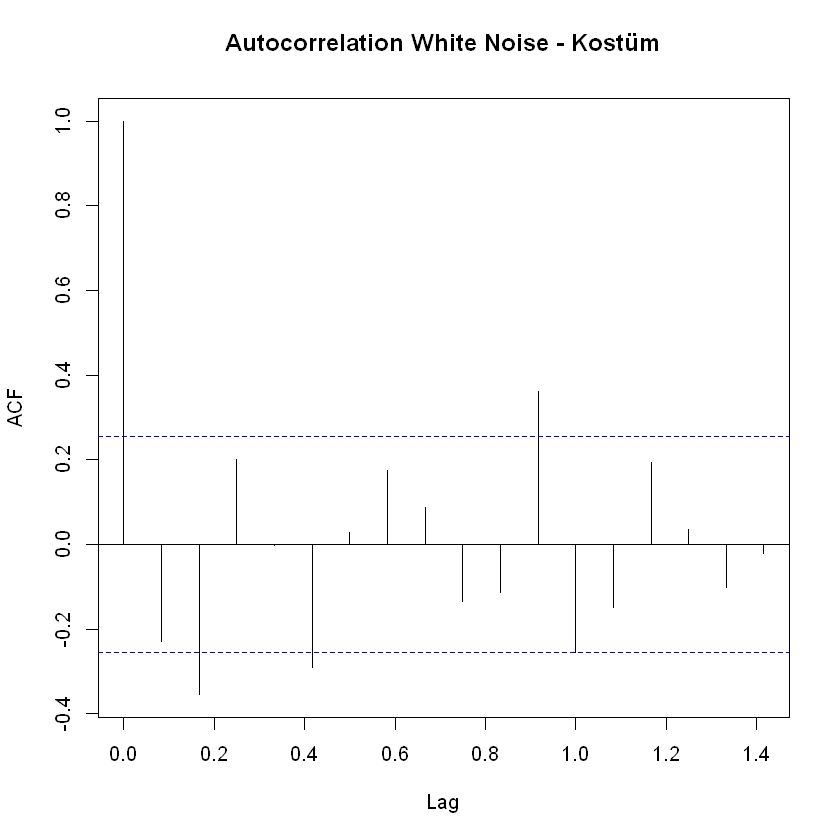


Autocorrelations of series 'Kostüm.WN', by lag

0.0000 0.0833 0.1667 0.2500 0.3333 0.4167 0.5000 0.5833 0.6667 0.7500 0.8333 
 1.000 -0.229 -0.354  0.202 -0.001 -0.290  0.028  0.175  0.089 -0.134 -0.113 
0.9167 1.0000 1.0833 1.1667 1.2500 1.3333 1.4167 
 0.361 -0.255 -0.149  0.194  0.037 -0.100 -0.021 


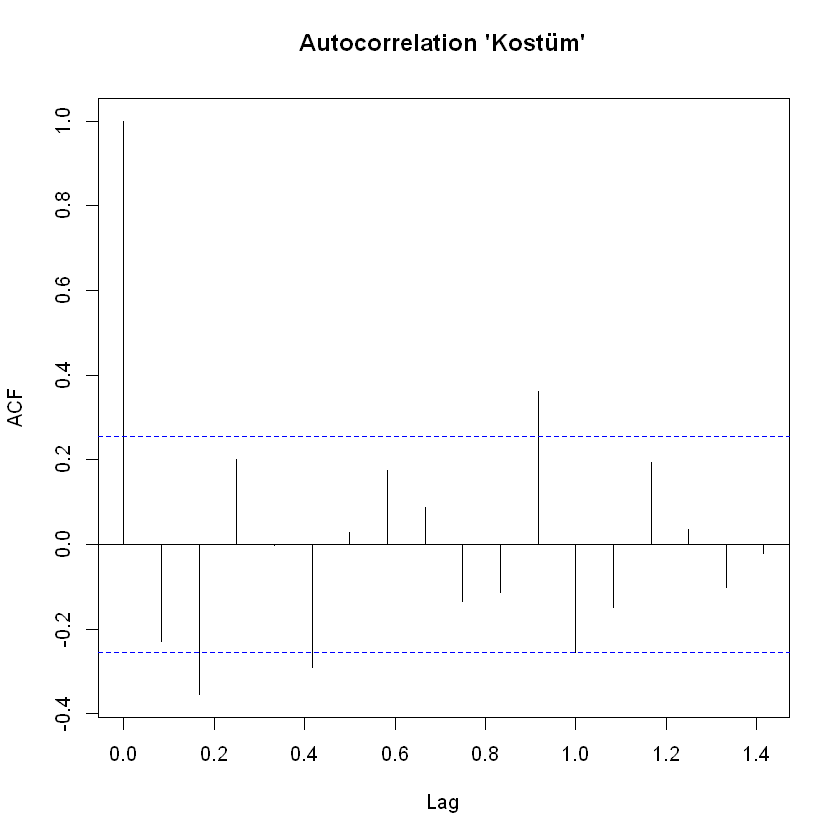

In [235]:
#Decompose multiplicative time series - Kostüm
Kostüm.ran <- decompose(Kostüm.ts, type = "multiplicative")$random

##A consequence of using a centred moving average of 12 months to smooth the time series, and thereby estimate the trend, is that the first six and last six terms in the random component cannot be calculated and are thus stored in R as NA
Kostüm.ran.ts <- window(Kostüm.ran, start = c(2011,7), end = c(2016,6))

#Comparing standard deviation
sd(Kürbis.ran.ts) #standard deviation of random component is lower than for the original time series

#By looking at the plot we can see that the random part of our decomposed time series looks very much like white noise
plot(Kürbis.ran.ts, main = "Random Component of decomposed Time Series - Kostüm", ylab = "")

#Check if second order properties (weak stationarity) for white noise series are met
mean(Kostüm.ran.ts)
var(Kostüm.ran.ts)
acf(Kostüm.ran.ts,type="covariance",main="Autocovariance 'Kostüm'")

print(acf(Kostüm.ran.ts, type = "covariance"))
acf(Kostüm.ran.ts,type="correlation",main="Autocorrelation 'Kostüm'")

print(acf(Kostüm.ran.ts,type="correlation",main="Autocorrelation 'Kostüm'"))

#First differentiation deviates least from the second order properties of white noise series
Kostüm.WN <- diff(Kostüm.ran.ts, differences=1)
plot(Kostüm.WN, main = "Differentiated random Component - Kostüm", ylab = "")

mean(Kostüm.WN)
var(Kostüm.WN)
acf(Kostüm.WN,type="covariance", main = "Autocovariance White Noise - Kostüm")

print(acf(Kostüm.WN,type="covariance"))
acf(Kostüm.WN,type="correlation",main="Autocorrelation White Noise - Kostüm")

print(acf(Kostüm.WN,type="correlation",main="Autocorrelation 'Kostüm'"))

In [234]:
#Augmented Dickey-Fuller Test (ADF)
adf.test(Kostüm.WN) 
#p-value smaller than printed p-value -> null hypothesis (not stationary) is recejted, 
# which means that the time series is stationary

Warning message in adf.test(Kostüm.WN):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  Kostüm.WN
Dickey-Fuller = -4.8763, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


In [232]:
#Kwiatkowski-Phillips-Schmidt-Shin Test
kpss.test(Kostüm.WN) #p-value greater than printed p-value -> null hypothesis (stationary) is not rejected, which mean that thetime series is stationary
#All tests indicate that our time series is stationary.

Warning message in kpss.test(Kostüm.WN):
"p-value greater than printed p-value"



	KPSS Test for Level Stationarity

data:  Kostüm.WN
KPSS Level = 0.032852, Truncation lag parameter = 3, p-value = 0.1


The upper right plot of the autocorrelation function (ACF) plot ‘Kürbis & Kostüm’ shows significant correlations at lags [2] and [13]. A significant correlation can be spottet by looking at values which go beyond the dotted blue line. This treshold is calculated by $ \frac{\pm1.96}{\sqrt{n-k}} $, with lag k and a sample size n (Cowpertwait 2009). The lower left ACF plot ‘Kostüm & Kürbis’ shows significant correlations at lags [-11], [-9] and [-1]. One lag equals one month. 

A significantly positive correlation can be seen in the lower left ‘Kostüm & Kürbis’ plot at lag [-11]. This indicates that an above average search interest in ‘Kostüm’ lags behind 11 months an above average search interest of ‘Kürbis’. At lag [-9] a significantly negative correlation is shown which means that a below (above) average search interest in ‘Kostüm’ lags behind 9 months an above (below) average search interest in ‘Kürbis’. A negative correlation indicates an inverse proportionality. Furthermore, the lags are negative, meaning that the interest in ‘Kostüm’ lags behind the interest in ‘Kürbis’.

The upper right plot ‘Kürbis & Kostüm’ shows a significantly negative correlation at lag [2]. This means that a below (above) search interest in ‘Kürbis’ leads to an above (below) average search interest in ‘Kostüm’ 2 months later. Here the lags are positive which indicate that the search interest in ‘Kürbis’ leads the search interst in ‘Kostüm’.

As mentioned before, there are several exceedances of the significancy level at several lags. Therefore, it is not verifiable by our data-driven method that the correlation between the search terms ‘Kürbis’ and Kostüm’ to be spurious.


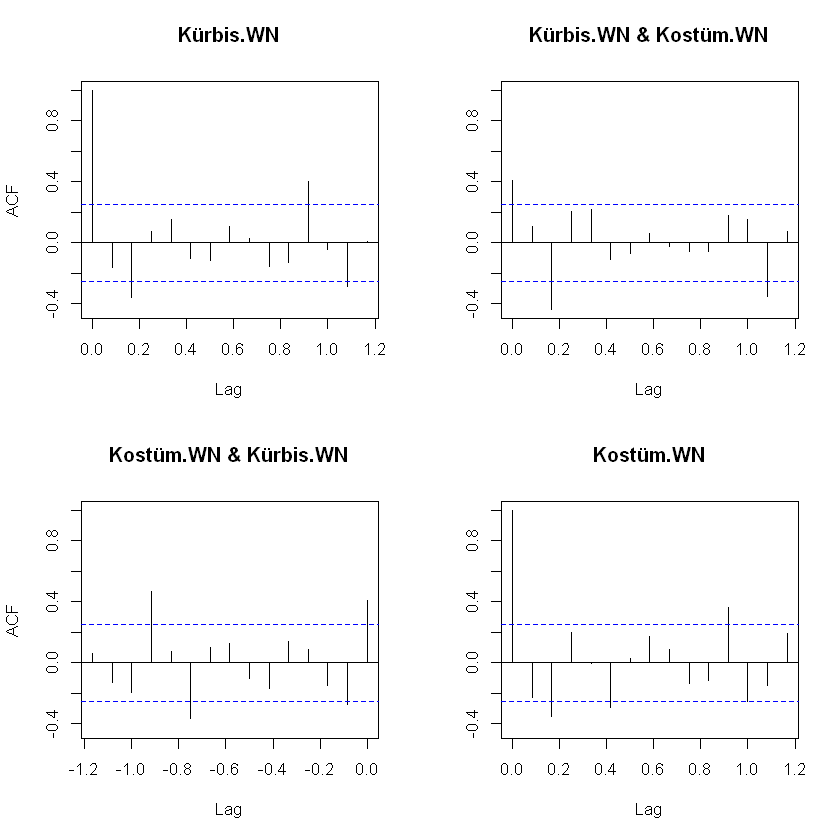

In [236]:
# Cross Correlation
# Correlogram
acf(ts.union(Kürbis.WN, Kostüm.WN))
#print(acf(ts.union(Kürbis.WN, Kostüm.WN, dframe=TRUE)))

# Conclusions & Managerial insights
At first glance, the data retrieved from `Kürbis.ts` and `Kostüm.ts` appears to be correlated. However, this is an erroneous conclusion derived from the seasonality of the data at hand. Taking into consideration both climatic circumstances (autumn in Germany is the harvest season of pumpkins) and regional holidays or traditions (in this case **Halloween** in October and **carnival** in February) sheds a different light on the data observation. In fact, Google searches for Kürbis may have rather been elevated by supermarkets offering reduced prices for pumpkins due to the harvest period. That is why a holistic view of influencing parameters and the viewing angle are crucial for reliable inferences of data. Consequently, it furthermore shows that it may be important to extract the seasonal component from a time series when seasonality threatens to blur the interpretability of data. The correlation is spurious and results from the relation to Halloween that both search words have in common. It can therefore be seen as an indirect correlation. A correlation could probably be significant for the search Kürbis and Halloween or Halloween and Kostüm. A Kostüm search on Google can be provoked by dozens of other motives and does not imply a search for Kürbis which the data shows: Kostüm searches have been significant also at other points in time when Kostüm searches were at a low. These relations could be approached when further deepening the understanding of the underlying dynamics of these time series.

Beyond that, the determination of correlations between successive values of time series can be used to further enhance the analysis of the development of Google searches for pumpkins and costumes: Exponential smoothing for instance can be used to make short-term forecasts for time series data and their predictability can be improved by taking correlations in the data into account.

Despite of all, it needs to be pointed out that the procedure used in this paper is one of several possible ways to solve this problem. For instance Autoregressive Integrated Moving Average (ARIMA) models can be used. They include an explicit statistical model for the random component that works with non-zero autocorrelations.
If this time series analysis of GoogleTrend data reaches real world business, it might find application in a very practical manner when considering for instance Marketing strategies of pumpkin producers and merchants who wish to find out when would be the best moment to start advertising for their products. As it comes to targeting strategies, the pumpkin sale could be boosted by relating the ads for it to costumes and decoration for Halloween. It can be also used to trigger a target group’s interest by manipulating the search outcome via GoogleAdWords. For instance could hits for “Kostüm” invoke pop-ups of pumpkin sales offers. People might consider buying it when preparing a Halloween party for instance.

In can be concluded that the use of different models analysing this time series as well as their interpretation, always depends on the objective of the analysis. For matters of forcasting, decomposition of the time series and a test for stationarity can be useful. Further interpretation of the relation between Kürbis and Kostüm searches requires a deep understanding of the underlying mechanisms influencing the search results.
